# Evolutionary algorithm

## 1. Install dependencies

In [19]:
# %pip install numpy

## 2. Declaration of functions to optimize

In [20]:
import numpy as np

In [21]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

## 2. Creating algorithm

### 2.1 Useful functions declaration

In [37]:
def calculate_scores(population, function):
    return np.array([function(gen) for gen in population])

In [38]:
def selection(population, fitness_scores):
    inverted_fitness_scores = 1 / (fitness_scores + 1e-6)
    total_fitness = np.sum(inverted_fitness_scores)
    selection_probabilities = inverted_fitness_scores / total_fitness
    
    parents_indices = np.random.choice(np.arange(len(population)), size=len(population), p=selection_probabilities)
    parents = population[parents_indices]
    return parents

In [39]:
def crossover(parents, pc):
    children = np.zeros_like(parents)
    for i in range(len(parents)):
        if np.random.rand() < pc:
            parent1 = parents[np.random.randint(len(parents))]
            parent2 = parents[np.random.randint(len(parents))]
            children[i] = np.array([parent1[0], parent2[1]])
        else:
            children[i] = parents[i]
    return children

In [40]:
def mutate(children, pm, distance=100):
    for i in range(len(children)):
        for j in range(2):
            if np.random.rand() < pm:
                children[i][j] = np.random.uniform(-distance, distance)
    return children

### 2.2 Algorithm implementation

In [98]:
def evolutionary_algorithm(function, base_length=1000, max_iter=1000, pm=0.01, pc=0.7, solution_check=50):

    all_populations = []
    all_fitness_scores = []

    population = np.random.uniform(-100, 100, size=(base_length, 2))
    best_solutions = []
    best_scores = []
    iterations = max_iter

    for i in range(max_iter):
        # Rating individuals
        fitness_scores = calculate_scores(population, function)
        all_populations.append(population)
        all_fitness_scores.append(fitness_scores)

        # Parent selection
        parents = selection(population, fitness_scores)

        # Crossover
        children = crossover(parents, pc)

        # Mutation and succession
        population = mutate(children, pm)
    
        solution = population[np.argmin(calculate_scores(population, function))]
        solution_score = function(solution)
        best_solutions.append(solution)
        best_scores.append(solution_score)

        if i % solution_check == 0 and i > 0:
            print(f"Simulating generation {i}. This generation info:")
            print(f"Lowest score: {solution_score}\nBest solution: {solution}")
            if np.round(best_scores[-1], 8) == np.round(best_scores[i - solution_check], 8):
                iterations = i
                break

    return best_solutions, best_scores, all_populations, all_fitness_scores, iterations


## 3. Application on functions

#### Useful functions

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
def plot_scores(scores):
    plt.plot(scores)
    plt.xlabel('Generations')
    plt.ylabel('Best scores')

### 3.1 Himmelblau's function

In [101]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.7
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 100. This generation info:
Lowest score: 1.6636869929674463
Best solution: [-3.94882371 -3.30380845]
Simulating generation 200. This generation info:
Lowest score: 0.13462550590184297
Best solution: [-3.82889532 -3.30380845]
Simulating generation 300. This generation info:
Lowest score: 0.13462550590184297
Best solution: [-3.82889532 -3.30380845]


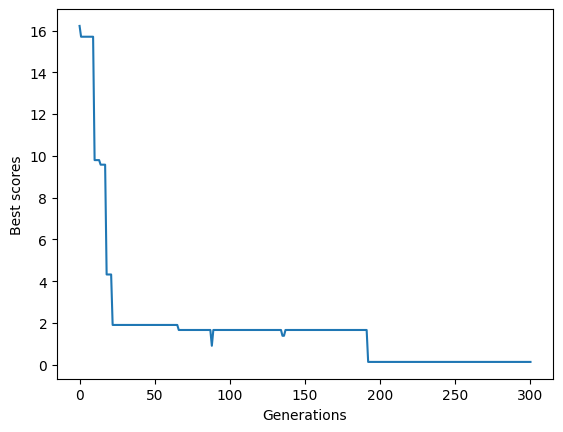

In [102]:
plot_scores(scores)

In [103]:
base_lenght = 10000
max_iter = 1000
pm = 0.01
pc = 0.7
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 100. This generation info:
Lowest score: 0.00031903237079846454
Best solution: [3.00297332 1.99985282]
Simulating generation 200. This generation info:
Lowest score: 0.00031903237079846454
Best solution: [3.00297332 1.99985282]


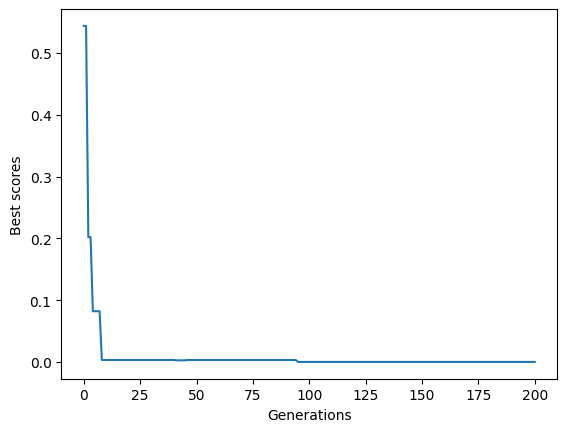

In [104]:
plot_scores(scores)

### 3.2 Ackley's function

In [105]:
base_lenght = 10000
max_iter = 1000
pm = 0.01
pc = 0.7
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 100. This generation info:
Lowest score: 0.038175616580052196
Best solution: [ 0.00602555 -0.01051191]
Simulating generation 200. This generation info:
Lowest score: 0.03872666208631559
Best solution: [-0.00633822 -0.01051191]
Simulating generation 300. This generation info:
Lowest score: 0.03872666208631559
Best solution: [-0.00633822 -0.01051191]


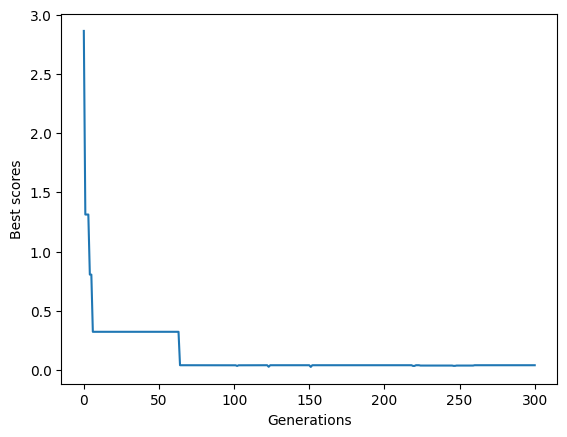

In [106]:
plot_scores(scores)

In [113]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.9
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 100. This generation info:
Lowest score: 0.19005800800539463
Best solution: [ 0.02835517 -0.03728382]
Simulating generation 200. This generation info:
Lowest score: 0.19005800800539463
Best solution: [ 0.02835517 -0.03728382]


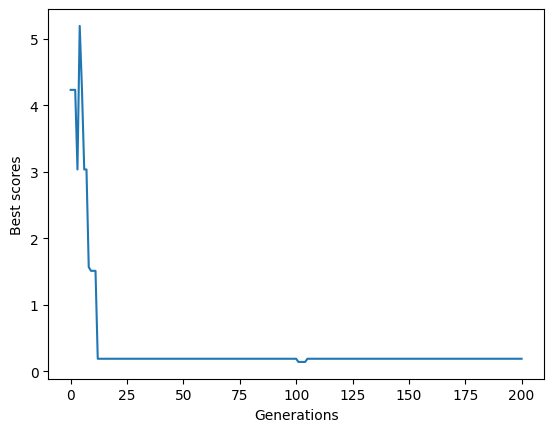

In [114]:
plot_scores(scores)